# ベルマン方程式

```{math}
\newcommand{\E}{{\mathrm E}}
\newcommand{\underE}[2]{\underset{\begin{subarray}{c}#1 \end{subarray}}{\E}\left[ #2 \right]}
\newcommand{\Epi}[1]{\underset{\begin{subarray}{c}\tau \sim \pi \end{subarray}}{\E}\left[ #1 \right]}
```

本章では，価値関数/行動価値関数が満たす再帰的な性質を基にした **ベルマン方程式(Bellman equation)** を紹介します．
この方程式は，現在の状態$s$の価値$V(s)$と次の状態$s'$の価値$V(s')$の関係に着目することにより得られる方程式で，
様々な強化学習アルゴリズムで利用されています．

## ベルマン方程式

価値関数の定義式{eq}`vpi difinition`と$G_t$に関する再帰的な式{eq}`g_t recursion`より以下のような式変形が行えます．

$$
V^\pi(s) &= \underE{\pi}{G_t | S_t = s}\\
&= \underE{\pi}{R_t + \gamma G_{t+1} | S_t = s}\\
&= \sum_{a \in \mathcal{A}} \pi(a|s) \left(r(s, a) + \gamma  \sum_{s' \in \mathcal{S}}  p(s'|s,a) \underE{\pi}{ G_{t+1} | S_{t+1} = s' }\right)\\
&= \sum_{a \in \mathcal{A}} \pi(a|s) \left( r(s,a) + \gamma \sum_{s' \in \mathcal{S}}  p(s'|s,a)V^\pi(s')  \right), \forall s \in \mathcal{S}
$$ (v_expansion)

この式変形は直感的に，「現在の状態の価値 ＝ （即時報酬 ＋ 次の状態の価値）の期待値」としたものであると捉えることが出来ます．

同様の式変形を行動価値関数に関しても適用できます．

$$Q^\pi(s,a) &= \underE{\pi}{G_t | S_t = s, A_t = a}\\
&= \underE{\pi}{R_t + \gamma G_{t+1} | S_t = s, A_t = a}\\
&= r(s,a) + \gamma \sum_{s' \in \mathcal{S}} p(s'|s,a) \sum_{a' \in \mathcal{A}} \pi(a'|s') Q^\pi(s', a'), \forall s \in \mathcal{S}, a \in \mathcal{A}$$ (q_expansion)


これらの式変形より，$V^\pi$は関数$v : \mathcal{S} \rightarrow \mathbb{R}$に関する方程式


$$v(s)
=\sum_{a \in \mathcal{A}} \pi(a|s) \left( r(s,a) + \gamma \sum_{s' \in \mathcal{S}} p(s'|s,a)v(s') \right), \forall s \in \mathcal{S}$$ (bellman_v)

の解であることがわかり，
$Q^\pi$は関数$q : \mathcal{S} \times \mathcal{A} \rightarrow \mathbb{R}$に関する方程式

$$q(s,a)
= r(s,a) + \gamma \sum_{s' \in \mathcal{S}} p(s'|s,a) \sum_{a' \in \mathcal{A}} \pi(a'|s') q(s', a'), \forall s \in \mathcal{S}, a \in \mathcal{A}$$ (bellman_q)

の解であることがわかります．
方程式{eq}`bellman_v`,{eq}`bellman_q`はベルマン方程式と呼ばれています．

これらの方程式の嬉しいところは，
環境が既知であるならば，
<font color='red'>$V^\pi,Q^\pi$を求める問題を方程式{eq}`bellman_v`,{eq}`bellman_q`の解を求める問題と捉えることが出来る</font>ことです．

また，式{eq}`vpi qpi relation`の結果と式{eq}`q_expansion`より

$$Q^\pi(s,a) &= r(s,a) + \gamma \sum_{s' \in \mathcal{S}} p(s'|s,a) \sum_{a' \in \mathcal{A}} \pi(a'|s') Q^\pi(s', a')\\
& = r(s,a) + \gamma \sum_{s' \in \mathcal{S}} p(s'|s,a) V^\pi(s'), \forall s \in \mathcal{S}, a \in \mathcal{A}$$ (vpi qpi relation2)

が成り立つ，つまり，$V^\pi$が求まれば$Q^\pi$も求まるため本節では主に価値関数についてのみ扱います．


### ベルマン作用素

ベルマン方程式をより深く分析するため，ベルマン方程式を基にした **ベルマン作用素(Bellman operator)** というものを導入します．

ベルマン作用素は，ある関数$v : \mathcal{S} \rightarrow \mathbb{R}$に対する写像$B_\pi: \mathbb{R}^{|\mathcal{S}|} \rightarrow \mathbb{R}^{|\mathcal{S}|}$であり，

$$(B_\pi(v))(s) := \sum_{a \in \mathcal{A}} \pi(a|s) \left( r(s,a) + \gamma \sum_{s' \in \mathcal{S}}  p(s'|s,a)v(s')  \right), \forall s \in \mathcal{S}$$

と定義されます．

このベルマン作用素を用いて，式{eq}`bellman_v`のベルマン方程式を以下のように書き表せます．

$$v = B_\pi(v), \forall s \in \mathcal{S}$$

このように，ある作用素に対して$v = B(v)$のような関係を成り立たせる$v$を**不動点(fixed-point)** と呼びます．

また，この作用素は同じ関数に k 回適用した場合，つまり$B( \cdots B(B(v)))$とした場合$B^k(v)$のように表記します．

このベルマン作用素に対して以下の命題が成り立ちます．

```{prf:proposition} $B_\pi$の収束性
:label: b_pi_convergence

任意の有界関数$v:\mathcal{S} \rightarrow \mathbb{R}$に対して，ベルマン作用素$B_\pi$を繰り返し適用した関数$(B_\pi^k v)$は価値関数$V^\pi$に漸近的に等しくなる．

$$V^\pi(s) = \lim_{k\rightarrow \infty} (B_\pi^k(v))(s), \forall s \in \mathcal{S}$$

```

```{prf:proposition} $B_\pi$の不動点の一意性
:label: b_pi_fixed_point

以下のベルマン方程式

$$v = B_\pi(v), \forall s \in \mathcal{S}$$

を満たす解は価値関数$V^\pi$ただ一つである．

```

これらの命題より，環境の情報が既知である場合
  (solve_bellman_operator)=
  1. {prf:ref}`b_pi_convergence`より，任意の関数$v$に対して$B_\pi$を繰り返し適用する
  2. {prf:ref}`b_pi_fixed_point`$より，v = B_\pi(v), \forall s \in \mathcal{S}$を直接解く

の2通り方法で$V^\pi$を得ることが出来ます．

### 実装

本節では，前節のコンセプトを基にした手法の実装を示し，
実際に[FrozenLake](https://www.gymlibrary.ml/environments/toy_text/frozen_lake/)環境に適用してみます．


In [2]:
import gym

env = gym.make(
    "FrozenLake-v1",
    desc=["SFFF", "FHFH", "FFFH", "HFFG"],
    map_name="4x4",
)


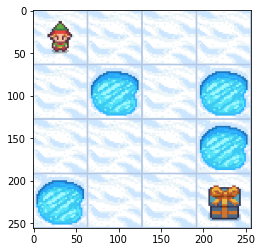

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

env.reset()

plt.imshow(env.render(mode='rgb_array'))

まずは，実装上扱いやすくするために，ベルマン方程式{eq}`bellman_v`を，行列形式(テーブル型)に変換してみます．
状態空間$\mathcal{S}$は有限であるため，
関数$v : \mathcal{S} \rightarrow \mathbb{R}$は，以下のようなベクトル$v \in \mathbb{R}^{|\mathcal{S}|}$と等価であるとみなすことが出来ます．

$$
v = \left(
\begin{array}{c}
v(s_0)\\
v(s_1)\\
\vdots\\
v(s_{|\mathcal{S}|})
\end{array}
\right),\ \mathcal{S} = \{s_0, s_1, \cdots s_{|\mathcal{S}|}\}
$$

価値関数以外にも，環境の情報も行列形式にすることが可能です．報酬の期待値$g(s) = \sum_{a \in \mathcal{A}} \pi(a|s) r(s,a)$も価値関数と同様にベクトル$g \in \mathbb{R}^{|\mathcal{S}|}$とします．

$$
g = \left(
\begin{array}{c}
g(s_0)\\
g(s_1)\\
\vdots\\
g(s_{|\mathcal{S}|})
\end{array}
\right),\ \mathcal{S} = \{s_0, s_1, \cdots s_{|\mathcal{S}|}\}
$$

方策$\pi$上で状態$s$から$s'$に遷移する確率$P_\pi(s,s') = \sum_{a \in \mathcal{A}} \pi(a|s) p(s'|s,a)$を[確率行列](https://ja.wikipedia.org/wiki/%E7%A2%BA%E7%8E%87%E8%A1%8C%E5%88%97) $P_\pi \in \mathbb{R}^{|\mathcal{S}| \times |\mathcal{S}|}$とします．

$$
P_\pi = \left(
\begin{array}{ccc}
    P_\pi(s_0, s_0)               & \cdots & P_\pi(s_0, s_{|\mathcal{S}|})               \\
    \vdots                        & \ddots & \vdots                                      \\
    P_\pi(s_{|\mathcal{S}|}, s_0) & \cdots & P_\pi(s_{|\mathcal{S}|}, s_{|\mathcal{S}|})
  \end{array}
\right),\ \mathcal{S} = \{s_0, s_1, \cdots s_{|\mathcal{S}|}\}
$$

これらの行列を用いてベルマン方程式{eq}`bellman_v`を書き表すと，

$$v = g + \gamma P_\pi v$$ (bellman_eq_matrix_ver)

となり，一般的な行列計算として実装上でも扱いやすい形となります．

[FrozenLake](https://www.gymlibrary.ml/environments/toy_text/frozen_lake/)環境において，行動を一様ランダムに選択，つまり$\pi(a|s) = \frac{1}{4}$とした場合の環境情報$g, P_\pi$を求めると以下のようになります．


In [4]:
import numpy as np

np.set_printoptions(threshold=10)

state_size = env.observation_space.n
action_size = env.action_space.n


def p(sp, s, a):
    """状態遷移関数

    Args:
        sp : 次の状態 s'
        s  : 現在の状態 s
        a  : 現在の状態で選択する行動 a

    Returns:
        sでaを選択した後s'に遷移する確率
    """
    # 以下の実装はFrozenLake環境の内部実装を参考にしている．
    transition = env.P[s][a]
    prob = 0.0
    for t in transition:
        if t[1] == sp:
            prob += t[0]
    return prob


def r(s, a):
    """報酬"""
    transition = env.P[s][a]
    reward = 0.0
    for t in transition:
        reward += t[0] * t[2]
    return reward


def pi(a, s):
    """方策"""
    return 1.0 / 4.0


P = np.zeros((state_size, state_size))

for s in range(state_size):
    for sp in range(state_size):
        P[s, sp] = np.sum([pi(a, s) * p(sp, s, a) for a in range(action_size)])

g = np.zeros((state_size,))

for s in range(state_size):
    g[s] = np.sum([pi(a, s) * r(s, a) for a in range(action_size)])


In [5]:
print(f"P = \n{P}")


P = 
[[0.5  0.25 0.   ... 0.   0.   0.  ]
 [0.25 0.25 0.25 ... 0.   0.   0.  ]
 [0.   0.25 0.25 ... 0.   0.   0.  ]
 ...
 [0.   0.   0.   ... 0.25 0.25 0.  ]
 [0.   0.   0.   ... 0.25 0.25 0.25]
 [0.   0.   0.   ... 0.   0.   1.  ]]


In [6]:
print(f"g = \n{g}")


g = 
[0.   0.   0.   ... 0.   0.25 0.  ]


これらをもとに[前述の 2 つの手法](solve_bellman_operator)を用いて，価値関数を求めていきます．

まずは 1 の手法をもとに，任意の関数`v1`(ここではゼロで初期化)に$B_\pi$を繰り返し適用し，価値関数を求めると以下のようになります．


In [13]:
GAMMA = 0.99  # 割引率

v1 = np.zeros((state_size,))  # 価値関数の初期値

v1_log = [v1]  # ログ保存用のリスト

for _ in range(50):
    v1 = g + GAMMA * P @ v1  # ベルマン作用素により更新
    v1_log.append(v1)  # ログを保存

print(f"v1 =\n{v1}")


v1 =
[0.01235348 0.01042258 0.01933677 ... 0.17034441 0.43357905 0.        ]


また，2の手法をもとに価値関数(ここでは変数`v2`)を求めます．
式{eq}`bellman_eq_matrix_ver`の方程式の解は

$$v = (I - \gamma P_\pi)^{-1}g$$

となるため，この式を用いて解を求めます．

In [9]:
v2 = np.linalg.inv(np.eye(state_size, state_size) - GAMMA*P)@g

print(f"v2 =\n{v2}")

v2 =
[0.01235614 0.01042446 0.01933844 ... 0.17034482 0.43357944 0.        ]


1の手法における解の収束と2の手法で求めた解を比べると以下のようになります．

/tmp/ipykernel_56299/3956484144.py:9: UserWarning: Attempting to set identical bottom == top == -0.0 results in singular transformations; automatically expanding.
  plt.ylim(-0.0, v2[i] * 1.2)
/tmp/ipykernel_56299/3956484144.py:9: UserWarning: Attempting to set identical bottom == top == -0.0 results in singular transformations; automatically expanding.
  plt.ylim(-0.0, v2[i] * 1.2)


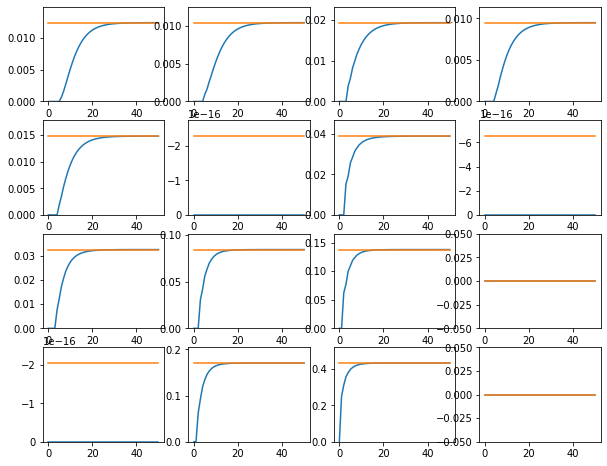

In [22]:
v1_log = np.array(v1_log)

plt.figure(figsize=(10, 8))

for i in range(state_size):
    plt.subplot(4, 4, i + 1)
    plt.plot(v1_log[:, i])
    plt.plot([v2[i] for _ in v1_log[:, i]])
    if abs(v2[i]) < 1E-5:
        plt.ylim(-0.01, 0.01)
    else:
        plt.ylim(0.0, v2[i] * 1.2 + 0.01)
    plt.title(f"s = {i}")

plt.tight_layout()